In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
#this is to actually check whether this works or not , for the given ERA-5 grid , will there will be fire_points or not for the given timestamps !

In [3]:
# Load ERA5 grid
era = xr.open_dataset(r"C:\Users\Ankit\Downloads\merged_era5_2015_2016.nc")
times = pd.to_datetime(era.get("time", era.get("valid_time")).values)
lat = era.latitude.values
lon = era.longitude.values

In [4]:
# Pick a test time that exists in both datasets
test_time = pd.Timestamp("2016-12-30 08:00")

In [12]:
viirs = pd.read_csv(r"C:\Users\Ankit\Downloads\filtered_viirs.csv")

In [13]:
viirs['acq_time'].dtype

dtype('int64')

In [14]:
viirs['acq_time'].unique()

array([ 744, 2008, 2148, 2111,  809, 2033, 2034,  750,  731,  732,  712,
        713,  853, 2117,  834, 2058,  815,  816, 2039, 2040,  756,  757,
       2020,  737,  738, 2001, 2002, 2142,  718,  719,  859,  821, 2046,
        802, 2027,  743,  724,  725, 1949, 2129,  706,  846, 2110,  647,
        827,  828, 2051,  808, 1955,  852,  833,  814,  755,  736,  858,
       1942, 2123,  659,  839,  840, 2103, 2104,  820, 2045,  801,  742,
       1948,  705,  845,  646,  826,  807, 2032,  749, 2014,  730, 1954,
       2134,  711, 2116,  652,  653, 2057, 2038, 2019, 2000,  717, 2122,
        700, 2026, 2007,  723,  748, 2013,  729, 2135,  832,  754,  658,
        838,  819, 2044, 2025,  704, 2050, 2012,  813,  735,  800,  741,
       2006, 1947, 2128,  844,  825,  806,  710,  851, 2115,  831, 2056,
       2037,  716,  857,  722, 2127,  703, 1928, 2109, 2031,  747,  728,
       1953,  709,  850,  651,  812,  753, 2018,  734, 1959,  856, 1940,
       2121,  657,  837, 2102,  818, 2043, 2024, 20

In [15]:
# as this acq_time is in numeric , converting it to string such that making it 4charackter long using  zfill , such that all looks similar 
#.str.zfill(4)
#Applies the string method zfill(4), which pads the string with leading zeros until it is 4 characters long.
#this acq_time 
viirs["acq_time"] = viirs["acq_time"].astype(str).str.zfill(4)

viirs["datetime"] = pd.to_datetime(viirs["acq_date"] + " " + viirs["acq_time"].str[:2] + ":00")
fire_points = viirs[viirs["datetime"] == test_time]

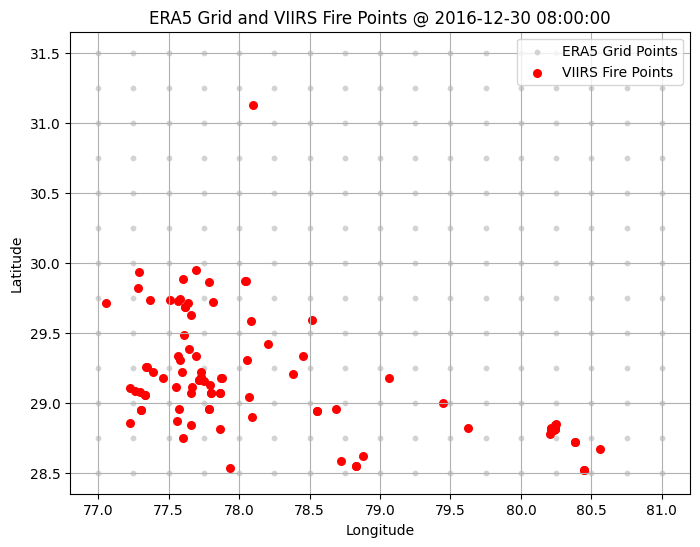

In [16]:
plt.figure(figsize=(8, 6))
lon_grid, lat_grid = np.meshgrid(lon, lat)
plt.scatter(lon_grid.ravel(), lat_grid.ravel(), s=10, color='lightgray', label='ERA5 Grid Points')
plt.scatter(fire_points["longitude"], fire_points["latitude"], c='red', label='VIIRS Fire Points', s=30)
plt.title(f"ERA5 Grid and VIIRS Fire Points @ {test_time}")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.legend()
plt.show()